<a href="https://colab.research.google.com/github/nhemanth1103/capstone_project/blob/main/Healthcare_Infrastructure_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Census-Based Study of Population Distribution and Healthcare Services

* Loads and filters Census 2011 data by selecting important columns like
population, age groups, literacy, and household details.

* Cleans and standardizes state and district names to ensure consistency across datasets, especially for Telangana and Ladakh.

* Checks for missing values in the data and calculates their percentage to assess data quality.

* Loads multiple hospital-related CSV files including government, AYUSH, and defense hospitals.

* Saves the cleaned datasets for further use in healthcare analysis.

* Performs basic analysis by comparing population data with hospital infrastructure to identify healthcare gaps or regional imbalances.

In [ ]:
# PROBLEM STATEMENT 1
# Path to your census 2011 data file
import pandas as pd

# Read the census data into a pandas DataFrame
df = pd.read_csv('census_2011.csv')

# List of columns to keep
relevant_columns = ["State name", "District name", "Population", "Male", "Female",
                   "Literate", "Male_Literate", "Female_Literate", "Rural_Households",
                   "Urban_Households", "Households", "Age_Group_0_29", "Age_Group_30_49",
                   "Age_Group_50", "Age not stated"]

# Create a new DataFrame with only the relevant columns
df_filtered = df[relevant_columns]

# Print the filtered DataFrame (optional)
# print(df_filtered)

# You can now save the filtered DataFrame to a new CSV file
df_filtered.to_csv("census_2011_filtered.csv", index=False)
df_filtered


,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,Rural_Households,Urban_Households,Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated
0,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,JAMMU AND KASHMIR,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,JAMMU AND KASHMIR,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,PONDICHERRY,Mahe,41816.0,19143.0,22673.0,36470.0,16610.0,19860.0,0.0,12110.0,12110.0,19760.0,NaN,9428.0,85.0
636,PONDICHERRY,Karaikal,200222.0,97809.0,102413.0,154916.0,79903.0,75013.0,35618.0,33715.0,69333.0,NaN,60089.0,NaN,366.0
637,ANDAMAN AND NICOBAR ISLANDS,Nicobars,36842.0,20727.0,NaN,25332.0,15397.0,9935.0,15958.0,0.0,15958.0,18786.0,12088.0,5922.0,46.0
638,ANDAMAN AND NICOBAR ISLANDS,North AND Middle Andaman,105597.0,54861.0,50736.0,78683.0,43186.0,35497.0,39091.0,1094.0,40185.0,57350.0,30741.0,17464.0,42.0


In [ ]:
# PROMBLEM STATEMENT 2
# Path to your data file


# Read the data from the CSV file
df = pd.read_csv('census_2011_filtered.csv')

# Define a dictionary to map old column names to new column names
column_renaming_map = {
    "State name": "State/UT",
    "District name": "District",
    "Male_Literate": "Literate_Male",
    "Female_Literate": "Literate_Female",
    "Rural_Households": "Households_Rural",
    "Urban_ Households": "Households_Urban",
    "Age_Group_0_29": "Young_and_Adult",
    "Age_Group_30_49": "Middle_Aged",
    "Age_Group_50": "Senior_Citizen",
    "Age not stated": "Age_Not_Stated"
}

# Rename the columns using the dictionary
df = df.rename(columns=column_renaming_map)

# Save the DataFrame with renamed columns to a new CSV file (optional)
df.to_csv("census_2011_filtered.csv", index=False)
 #df.to_csv("data_renamed.csv", index=False)

# Print the DataFrame with renamed columns (optional)
df


,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Urban_Households,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu And Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu And Kashmir,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Jammu And Kashmir,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,Jammu And Kashmir,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu And Kashmir,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,Pondicherry,Mahe,41816.0,19143.0,22673.0,36470.0,16610.0,19860.0,0.0,12110.0,12110.0,19760.0,NaN,9428.0,85.0
636,Pondicherry,Karaikal,200222.0,97809.0,102413.0,154916.0,79903.0,75013.0,35618.0,33715.0,69333.0,NaN,60089.0,NaN,366.0
637,Andaman And Nicobar Islands,Nicobars,36842.0,20727.0,NaN,25332.0,15397.0,9935.0,15958.0,0.0,15958.0,18786.0,12088.0,5922.0,46.0
638,Andaman And Nicobar Islands,North AND Middle Andaman,105597.0,54861.0,50736.0,78683.0,43186.0,35497.0,39091.0,1094.0,40185.0,57350.0,30741.0,17464.0,42.0


In [ ]:
# PROBLEM STATEMENT 3
import pandas as pd



# Read the census data into a pandas DataFrame
df = pd.read_csv('census_2011_filtered.csv')


def fix_state_ut_names(df):
  """Converts State/UT names to lowercase with first letter capitalized.

  Args:
      df: A pandas DataFrame containing a column named "State/UT".

  Returns:
      A pandas DataFrame with the "State/UT" column names fixed.
  """

  # Apply a lambda function to fix the naming
  df["State/UT"] = df["State/UT"].apply(lambda x: x.title())

  return df

# Fix State/UT names
df = fix_state_ut_names(df.copy())

# Print or save the DataFrame (optional)
# You can now save the DataFrame to a new CSV file
df.to_csv("census_2011_filtered.csv", index=False)
# df.to_csv("census_data_fixed.csv", index=False)
df

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Urban_Households,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu And Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu And Kashmir,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Jammu And Kashmir,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,Jammu And Kashmir,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu And Kashmir,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,Pondicherry,Mahe,41816.0,19143.0,22673.0,36470.0,16610.0,19860.0,0.0,12110.0,12110.0,19760.0,NaN,9428.0,85.0
636,Pondicherry,Karaikal,200222.0,97809.0,102413.0,154916.0,79903.0,75013.0,35618.0,33715.0,69333.0,NaN,60089.0,NaN,366.0
637,Andaman And Nicobar Islands,Nicobars,36842.0,20727.0,NaN,25332.0,15397.0,9935.0,15958.0,0.0,15958.0,18786.0,12088.0,5922.0,46.0
638,Andaman And Nicobar Islands,North AND Middle Andaman,105597.0,54861.0,50736.0,78683.0,43186.0,35497.0,39091.0,1094.0,40185.0,57350.0,30741.0,17464.0,42.0


In [ ]:
# PROBLEM STATEMENT 4
# Read the list of districts for Telangana from the text file
with open('Telangana.txt', 'r') as file:
    telangana_districts = [line.strip() for line in file]

# Rename State/UT from "Andhra Pradesh" to "Telangana" for the given districts
df.loc[df['District'].isin(telangana_districts), 'State/UT'] = 'Telangana'

# Rename the State/UT names for Leh and Kargil districts from "Jammu and Kashmir" to "Laddakh"
df.loc[df['District'].isin(['Leh(Ladakh)', 'Kargil']), 'State/UT'] = 'Laddakh'

# Display the first few rows of the DataFrame with updated State/UT names
df

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Urban_Households,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu And Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu And Kashmir,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Laddakh,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,Laddakh,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu And Kashmir,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,Pondicherry,Mahe,41816.0,19143.0,22673.0,36470.0,16610.0,19860.0,0.0,12110.0,12110.0,19760.0,NaN,9428.0,85.0
636,Pondicherry,Karaikal,200222.0,97809.0,102413.0,154916.0,79903.0,75013.0,35618.0,33715.0,69333.0,NaN,60089.0,NaN,366.0
637,Andaman And Nicobar Islands,Nicobars,36842.0,20727.0,NaN,25332.0,15397.0,9935.0,15958.0,0.0,15958.0,18786.0,12088.0,5922.0,46.0
638,Andaman And Nicobar Islands,North AND Middle Andaman,105597.0,54861.0,50736.0,78683.0,43186.0,35497.0,39091.0,1094.0,40185.0,57350.0,30741.0,17464.0,42.0


In [ ]:
# PROBLEM STATEMENT 5
import pandas as pd

# Assuming your data is loaded into a pandas dataframe named 'df'
def find_missing_data(df):
  # Find the total number of rows in the dataframe
  total_rows = len(df)
  # Find the number of missing values in each column
  missing_values = df.isnull().sum()
  # Calculate the percentage of missing data for each column
  percent_missing = (missing_values / total_rows) * 100
  # Create a DataFrame to store the results
  missing_data_df = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})
  # Sort the DataFrame by the percentage of missing data (descending order)
  missing_data_df = missing_data_df.sort_values(by='percent_missing', ascending=False)

  return missing_data_df

# Example usage:
df = pd.read_csv('census_2011_filtered.csv')
missing_data = find_missing_data(df.copy())
print(missing_data)

                       column_name  percent_missing
Households_Rural  Households_Rural          6.56250
Literate                  Literate          5.62500
Age_Not_Stated      Age_Not_Stated          5.46875
Female                      Female          5.15625
Urban_Households  Urban_Households          5.15625
Households              Households          5.00000
Literate_Male        Literate_Male          4.84375
Young_and_Adult    Young_and_Adult          4.84375
Senior_Citizen      Senior_Citizen          4.84375
Population              Population          4.68750
Male                          Male          4.68750
Middle_Aged            Middle_Aged          4.68750
Literate_Female    Literate_Female          4.21875
State/UT                  State/UT          0.00000
District                  District          0.00000


In [ ]:
# PROBLEM STATEMENT 6
df.to_csv('data\census_2011_filtered.csv', index=False)
df

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Urban_Households,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu And Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu And Kashmir,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Jammu And Kashmir,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,Jammu And Kashmir,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu And Kashmir,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,Pondicherry,Mahe,41816.0,19143.0,22673.0,36470.0,16610.0,19860.0,0.0,12110.0,12110.0,19760.0,NaN,9428.0,85.0
636,Pondicherry,Karaikal,200222.0,97809.0,102413.0,154916.0,79903.0,75013.0,35618.0,33715.0,69333.0,NaN,60089.0,NaN,366.0
637,Andaman And Nicobar Islands,Nicobars,36842.0,20727.0,NaN,25332.0,15397.0,9935.0,15958.0,0.0,15958.0,18786.0,12088.0,5922.0,46.0
638,Andaman And Nicobar Islands,North AND Middle Andaman,105597.0,54861.0,50736.0,78683.0,43186.0,35497.0,39091.0,1094.0,40185.0,57350.0,30741.0,17464.0,42.0


In [ ]:
# PROBLEM STATEMENT 7
import pandas as pd

# Read the data from the CSV file
df = pd.read_csv('housing.csv')
relevant_columns = ["District Name","Rural/Urban","Total Number of households","Total Number of Livable","Total Number of Dilapidated","Latrine_premise"]
df_filtered = df[relevant_columns]
# Select the columns you want
df_filtered = df[["District Name", "Rural/Urban", "Total Number of households"]]

# Assuming the data in "Total Number of households" is a percentage,
# convert it to a float and multiply by 100 to get the absolute value
df_filtered["Total Number of households"] = df_filtered["Total Number of households"].astype(float) * 100

# Print the DataFrame
print(df_filtered.to_string())

# To save the DataFrame to a new CSV file
# df.to_csv("absolute_values.csv", index=False)

                     District Name Rural/Urban  Total Number of households
0                          Kupwara       Rural                     10000.0
1                          Kupwara       Total                     10000.0
2                          Kupwara       Urban                     10000.0
3                           Badgam       Rural                     10000.0
4                           Badgam       Total                     10000.0
5                           Badgam       Urban                     10000.0
6                      Leh(Ladakh)       Rural                     10000.0
7                      Leh(Ladakh)       Total                     10000.0
8                      Leh(Ladakh)       Urban                     10000.0
9                           Kargil       Rural                     10000.0
10                          Kargil       Total                     10000.0
11                          Kargil       Urban                     10000.0
12                       

<ipython-input-9-6221565d11f7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Total Number of households"] = df_filtered["Total Number of households"].astype(float) * 100


In [ ]:
import pandas as pd

# Load the CSV file with the column to be copied
source_csv = "census_2011_filtered.csv"
column_to_copy = "Population"

# Load the CSV file where the column will be copied
destination_csv = "housing.csv"

# Read the source CSV file
source_df = pd.read_csv(source_csv)

# Extract the column to be copied
copied_column = source_df[column_to_copy]

# Read the destination CSV file
destination_df = pd.read_csv(destination_csv)

# Add the copied column to the destination DataFrame
destination_df[column_to_copy] = copied_column

# Save the destination DataFrame to a new CSV file
destination_df.to_csv("housing.csv", index=False)


In [ ]:
import pandas as pd

# Load the CSV file with the column to be copied
source_csv = "census_2011_filtered.csv"
column_to_copy = "Urban_Households"

# Load the CSV file where the column will be copied
destination_csv = "housing.csv"

# Read the source CSV file
source_df = pd.read_csv(source_csv)

# Extract the column to be copied
copied_column = source_df[column_to_copy]

# Read the destination CSV file
destination_df = pd.read_csv(destination_csv)

# Add the copied column to the destination DataFrame
destination_df[column_to_copy] = copied_column

# Save the destination DataFrame to a new CSV file
destination_df.to_csv("housing.csv", index=False)


In [ ]:
import pandas as pd

# Load the CSV file with the column to be copied
source_csv = "census_2011_filtered.csv"
column_to_copy = "Households_Rural"

# Load the CSV file where the column will be copied
destination_csv = "housing.csv"

# Read the source CSV file
source_df = pd.read_csv(source_csv)

# Extract the column to be copied
copied_column = source_df[column_to_copy]

# Read the destination CSV file
destination_df = pd.read_csv(destination_csv)

# Add the copied column to the destination DataFrame
destination_df[column_to_copy] = copied_column

# Save the destination DataFrame to a new CSV file
destination_df.to_csv("housing.csv", index=False)

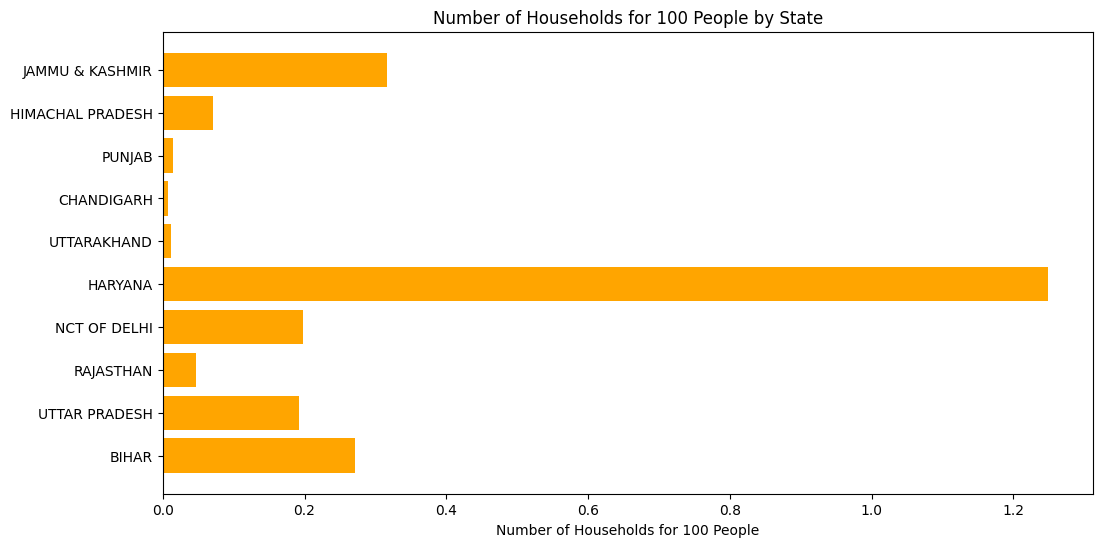

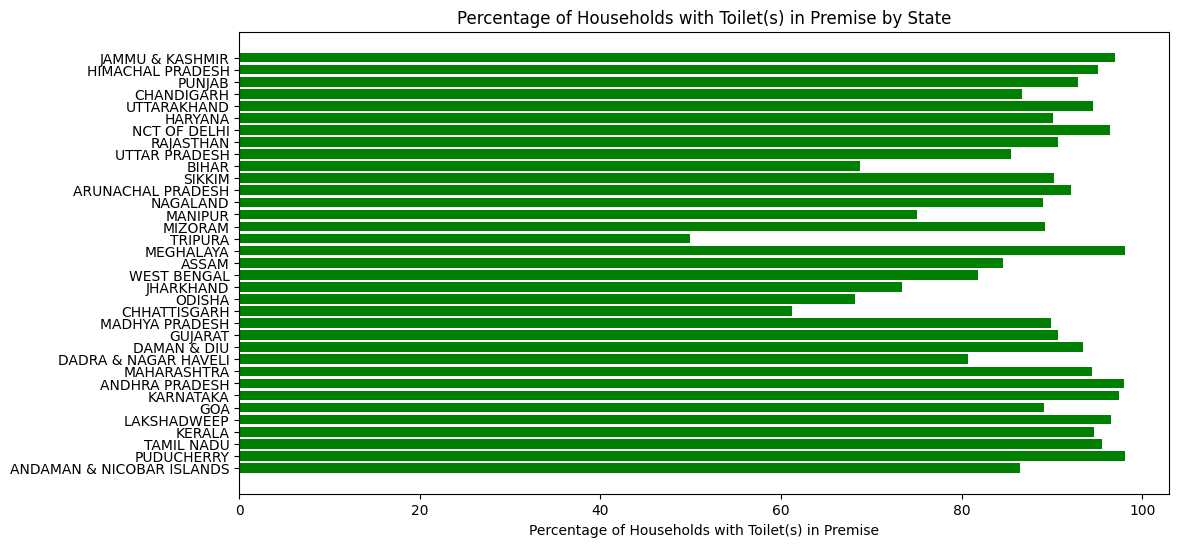

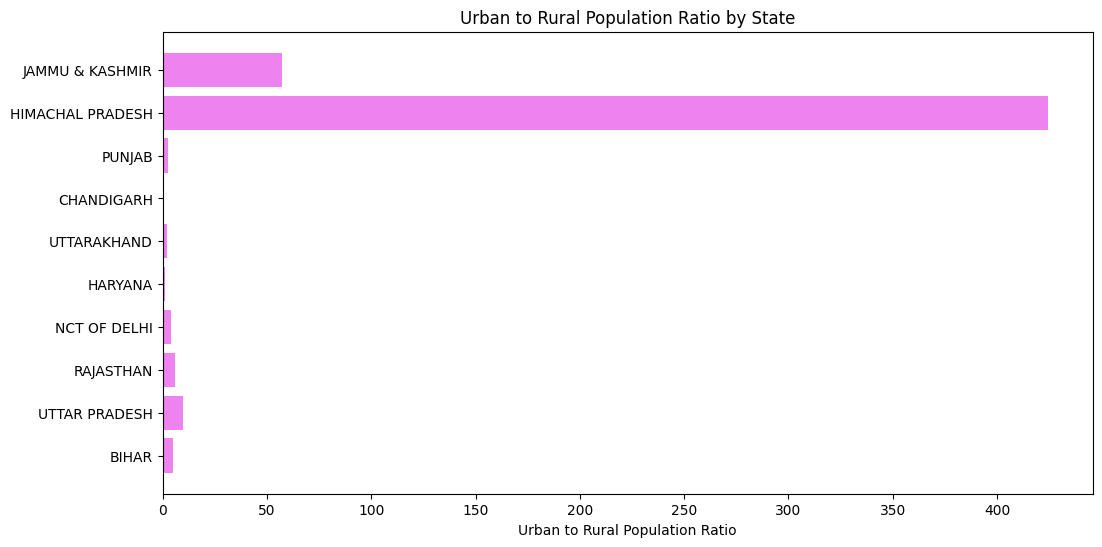

In [ ]:
# PROBLEM STATEMENT 8
import pandas as pd
import matplotlib.pyplot as plt

# Load the housing dataset
housing_data = pd.read_csv('housing.csv')

# Number of households for 100 people
housing_data['Households_per_100_people'] = (housing_data['Total Number of households'] / housing_data['Population']) * 100

# Percentage of households with toilet(s) in premise
housing_data['Percentage_with_toilet'] = (housing_data['Households_Bathroom'] / housing_data['Total Number of households']) * 100

# Urban to rural population ratio
housing_data['Urban_to_Rural_Ratio'] = housing_data['Urban_Households'] / housing_data['Households_Rural']

# Visualize Number of households for 100 people by state
plt.figure(figsize=(12, 6))
plt.barh(housing_data['State Name'], housing_data['Households_per_100_people'], color='orange')
plt.xlabel('Number of Households for 100 People')
plt.title('Number of Households for 100 People by State')
plt.gca().invert_yaxis()
plt.show()

# Visualize Percentage of households with toilet(s) in premise by state
plt.figure(figsize=(12, 6))
plt.barh(housing_data['State Name'], housing_data['Percentage_with_toilet'], color='green')
plt.xlabel('Percentage of Households with Toilet(s) in Premise')
plt.title('Percentage of Households with Toilet(s) in Premise by State')
plt.gca().invert_yaxis()
plt.show()

# Visualize Urban to rural population ratio by state
plt.figure(figsize=(12, 6))
plt.barh(housing_data['State Name'], housing_data['Urban_to_Rural_Ratio'], color='violet')
plt.xlabel('Urban to Rural Population Ratio')
plt.title('Urban to Rural Population Ratio by State')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("housing.csv")

# Define the new column names
new_column_names = {
    "District Name": "District name"
}

# Rename the columns
df.rename(columns=new_column_names, inplace=True)

# Save the DataFrame to a new CSV file
df.to_csv("housing_1.csv", index=False)

df

,State Code,State Name,District Code,District name,Tehsil Code,Tehsil Name,Town Code/Village code,Ward No,Area Name,Rural/Urban,...,Contition_T_Dilapidated,Contition_R_Total,Residence_Good,Residence_Livable,Residence_Dilapidated,Residence_cum_other,Residence_cum_Good,Population,Urban_Households,Households_Rural
0,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Rural,...,8.3,90.9,32.7,51.0,7.2,9.1,1.0,870354.0,NaN,158438.0
1,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Total,...,7.9,91.0,33.8,50.2,6.9,9.0,0.9,753745.0,27190.0,160649.0
2,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Urban,...,4.8,91.8,45.0,42.2,4.5,8.2,0.7,133487.0,17474.0,36920.0
3,1,JAMMU & KASHMIR,2,Badgam,0,Badgam,0,0,District - Badgam,Rural,...,3.9,97.2,49.0,44.5,3.7,2.8,0.7,140802.0,7774.0,40370.0
4,1,JAMMU & KASHMIR,2,Badgam,0,Badgam,0,0,District - Badgam,Total,...,3.8,97.3,50.8,43.0,3.5,2.7,0.8,NaN,15269.0,132139.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1903,35,ANDAMAN & NICOBAR ISLANDS,639,North & Middle Andaman,0,North & Middle Andaman,0,0,District - North & Middle Andaman,Total,...,2.8,97.5,51.2,43.5,2.8,2.5,1.4,NaN,NaN,NaN
1904,35,ANDAMAN & NICOBAR ISLANDS,639,North & Middle Andaman,0,North & Middle Andaman,0,0,District - North & Middle Andaman,Urban,...,6.6,95.8,36.3,53.0,6.5,4.2,1.2,NaN,NaN,NaN
1905,35,ANDAMAN & NICOBAR ISLANDS,640,South Andaman,0,South Andaman,0,0,District - South Andaman,Rural,...,3.5,98.3,62.0,32.8,3.5,1.7,1.0,NaN,NaN,NaN
1906,35,ANDAMAN & NICOBAR ISLANDS,640,South Andaman,0,South Andaman,0,0,District - South Andaman,Total,...,2.2,98.5,70.6,25.8,2.1,1.5,0.9,NaN,NaN,NaN


In [ ]:
# PROBLEM STATEMENT 9
import pandas as pd

# Read the housing data and census data
housing_data = pd.read_csv('housing_1.csv')
census_data = pd.read_csv('census_2011.csv')

# Merge the datasets on District Name
merged_data = pd.merge(housing_data, census_data, on='District name', suffixes=('_housing', '_census'))
merged_data = merged_data.rename(columns={'Existing_Column_Name': 'Urban_Households'})
df= pd.read_csv('housing.csv')
merged_data['Urban_Households'] = df['Urban_Households']
# Calculate the percentage difference between Households_Rural and Households_Urban
merged_data['Difference_Rural_Urban'] = abs((merged_data['Households_Rural'] - merged_data['Urban_Households']) / merged_data['Households_Rural']) * 100

# Filter districts with a major difference (> 10%)
major_difference_districts = merged_data[merged_data['Difference_Rural_Urban'] > 10]['District name']

# Print the names of districts with major differences
print("Districts with Major Differences (> 10%):")
print(major_difference_districts)

Districts with Major Differences (> 10%):
1        Kupwara
2        Kupwara
3         Badgam
4         Badgam
5         Badgam
         ...    
635    Madhubani
636       Supaul
637       Supaul
638       Supaul
639       Araria
Name: District name, Length: 547, dtype: object


In [ ]:
#PROBLEM STATEMENT 10

import pandas as pd

# Step 1: Load hospital data
hospital_data = pd.read_csv("hospitals.csv")

# Step 2: Load metadata
metadata = pd.read_csv("metadata.csv")

# Step 3: Define a mapping of acronyms to their meanings
acronym_mapping ={'PHC':'Number of Primary Health Centers(PHCs)','CHC':'Community Health Centers(CHCs)','SDH':'Sub-District/Divisional Hospitals(SDHs)','DH':'District Hospitals(DHs)'}


# Step 4: Rename the first column to 'State/UT
hospital_data.rename(columns={hospital_data.columns[0]: 'State/UT'}, inplace=True)

# Step 5: Rename other columns using the acronym mapping
hospital_data.rename(columns=acronym_mapping, inplace=True)

# Step 6: Save modified data to a new file
hospital_data.to_csv("hospitals.csv", index=False)

print("Headers renamed and data saved successfully.")

Headers renamed and data saved successfully.


In [ ]:
#PROBLEM STATEMENT 11
import csv
import os
def standardize_state_names(data, mapping):
    standardized_data = []
    for item in data:
        if item in mapping:
            standardized_data.append(mapping[item])
        else:
            standardized_data.append(item)
    return standardized_data
def fix_state_names_and_save(data):
    state_mapping = {
        "UP": "Uttar Pradesh",
        "TN": "Tamil Nadu",
        # Add more mappings as needed
    }
    # Fix State/UT names
    fixed_data = standardize_state_names(data, state_mapping)
    # Save data in CSV file
    folder_path = "Clean_Data"
    file_path = os.path.join(folder_path, "all_hospitals.csv")
    # Create the directory if it doesn't exist
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    # Write data to CSV
    with open(file_path, "w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        for row in fixed_data:
            writer.writerow([row])
    print(f"Data saved to {file_path}")
    return fixed_data
# Read data from uploaded CSV file
uploaded_file_path = "housing-colnames.csv"  # Change to your file path
with open('housing-colnames.csv', "r") as csvfile:
    reader = csv.reader(csvfile)
    data = [row[0] for row in reader]
# Fix State/UT names and save the data
fixed_data = fix_state_names_and_save(data)
print(fixed_data)

Data saved to Clean_Data/all_hospitals.csv
['State Code', 'State Name', 'District Code', 'District Name', 'Tehsil Code', 'Tehsil Name', 'Town Code', 'Ward No', 'Area Name', 'Rural/Urban', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20', 'c21', 'c22', 'c23', 'c24', 'c25', 'c26', 'c27', 'c28', 'c29', 'c30', 'c31', 'c32', 'c33', 'c34', 'c35', 'c36', 'c37', 'c38', 'c39', 'c40', 'c41', 'c42', 'c43', 'c44', 'c45', 'c46', 'c47', 'c48', 'c49', 'c50', 'c51', 'c52', 'c53', 'c54', 'c55', 'c56', 'c57', 'c58', 'c59', 'c60', 'c61', 'c62', 'c63', 'c64', 'c65', 'c66', 'c67', 'c68', 'c69', 'c70', 'c71', 'c72', 'c73', 'c74', 'c75', 'c76', 'c77', 'c78', 'c79', 'c80', 'c81', 'c82', 'c83', 'c84', 'c85', 'c86', 'c87', 'c88', 'c89', 'c90', 'c91', 'c92', 'c93', 'c94', 'c95', 'c96', 'c97', 'c98', 'c99', 'c100', 'c101', 'c102', 'c103', 'c104', 'c105', 'c106', 'c107', 'c108', 'c109', 'c110', 'c111', 'c112', 'c113', 'c114', 'c115', 'c116', 'c117', 'c118', 'c119', 'c120', 'c121', 'c122', 'c123

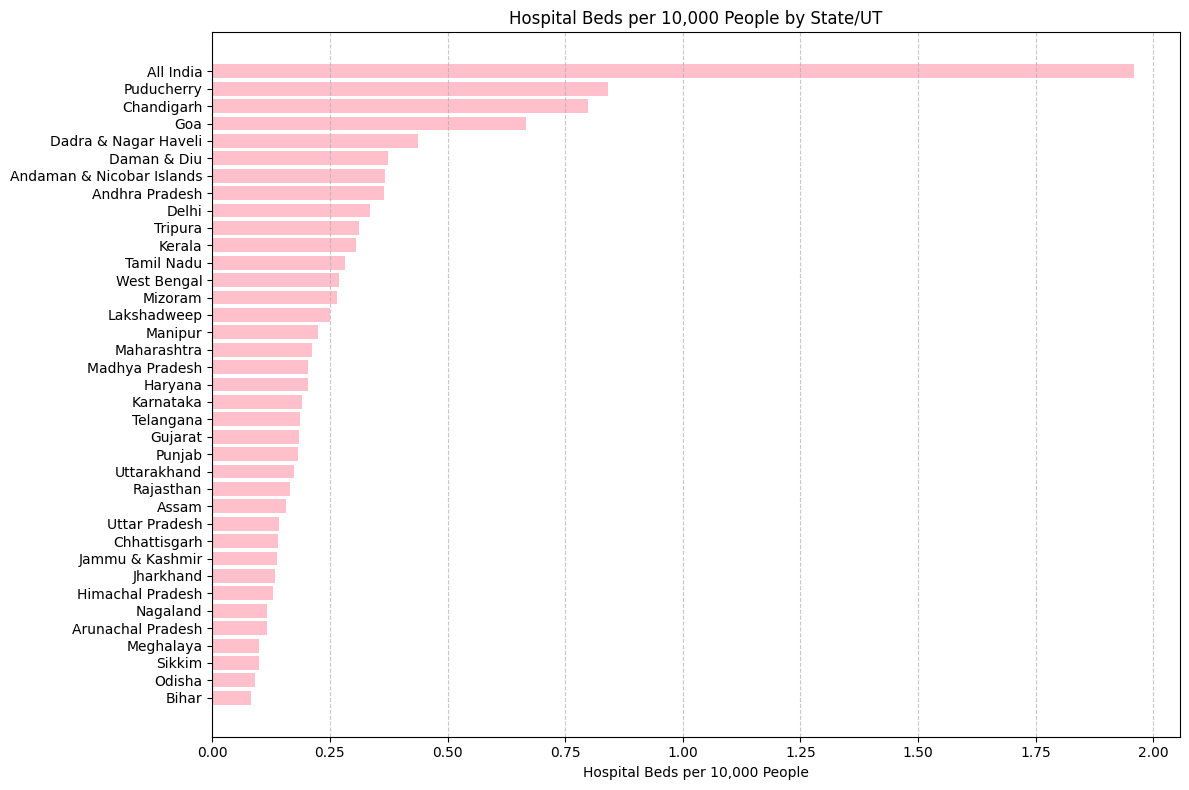

Three States/UTs with the least amount of beds for their population:
   State/UT  BedsPer10000
4     Bihar      0.082926
25   Odisha      0.091701
29   Sikkim      0.099565


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Given data
data = {
    "State/UT": ["Andaman & Nicobar Islands", "Andhra Pradesh", "Arunachal Pradesh", "Assam", "Bihar", "Chandigarh", "Chhattisgarh", "Dadra & Nagar Haveli", "Daman & Diu", "Delhi", "Goa", "Gujarat", "Haryana", "Himachal Pradesh", "Jammu & Kashmir", "Jharkhand", "Karnataka", "Kerala", "Lakshadweep", "Madhya Pradesh", "Maharashtra", "Manipur", "Meghalaya", "Mizoram", "Nagaland", "Odisha", "Puducherry", "Punjab", "Rajasthan", "Sikkim", "Tamil Nadu", "Telangana", "Tripura", "Uttar Pradesh", "Uttarakhand", "West Bengal", "All India"],
    "Population": [0.34, 16.66, 1.99, 12.20, 21.46, 0.47, 10.23, 0.13, 0.08, 6.15, 0.40, 22.36, 6.83, 6.71, 8.18, 5.58, 29.43, 12.97, 0.10, 18.67, 32.39, 1.14, 4.58, 0.87, 1.66, 17.99, 0.53, 7.42, 31.39, 1.15, 25.81, 9.32, 1.57, 41.22, 3.83, 19.05, 37.73],
    "HospitalBeds": [1246, 60799, 2320, 19115, 17796, 3756, 14354, 568, 298, 20572, 2666, 41129, 13841, 8706, 11342, 7404, 56333, 39511, 250, 38140, 68998, 2562, 4585, 2312, 1944, 16497, 4462, 13527, 51844, 1145, 72616, 17358, 4895, 58310, 6660, 51163, 739024]
}

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Calculate population density (per 10,000 people)
df['PopulationDensity'] = df['Population'] * 10000

# Calculate hospital beds per 10,000 people
df['BedsPer10000'] = df['HospitalBeds'] / df['PopulationDensity']

# Sort the dataframe by BedsPer10000 in ascending order
df_sorted = df.sort_values(by='BedsPer10000', ascending=True)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(df_sorted['State/UT'], df_sorted['BedsPer10000'], color='pink')
plt.xlabel('Hospital Beds per 10,000 People')
plt.title('Hospital Beds per 10,000 People by State/UT')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print three States/UTs with the least amount of beds for their population
print("Three States/UTs with the least amount of beds for their population:")
print(df_sorted[['State/UT', 'BedsPer10000']].head(3))

In [ ]:
#PROBLEM STATEMENT 13
import pandas as pd

# Step 1: Import the data
government_hospitals_data = pd.read_csv("government_hospitals.csv", header=[0, 1])

# Step 2: Update column names
new_columns = [
    'State/UT',
    'Rural_Government_Hospitals',
    'Rural_Government_Beds',
    'Urban_Government_Hospitals',
    'Urban_Government_Beds',
    'Last_Updated'
]
government_hospitals_data.columns = new_columns

# Step 3: Combine the two header rows into a single row
government_hospitals_data.columns = government_hospitals_data.columns.map('_'.join)

# Step 4: Drop the original header rows
government_hospitals_data = government_hospitals_data.iloc[1:]

# Step 5: Save the updated data to a new CSV file
government_hospitals_data.to_csv("updated_government_hospitals.csv", index=False)

print("Data updated and saved successfully!")

Data updated and saved successfully!


In [ ]:
#PROBLEM STATEMENT 14
import pandas as pd
import os

def clean_hospital_data(data, dataset_type):
    """
    Cleans the hospital data by standardizing State/UT names and updating the Last_Updated column.

    Args:
    - data: DataFrame containing hospital data.
    - dataset_type: Type of dataset ('all_hospitals' or 'government_hospitals').

    Returns:
    - Cleaned DataFrame.
    """
    # Standardize State/UT names
    state_name_mapping = {
        "Jammu & Kashmir": "Jammu and Kashmir",
        # Add more mappings as needed
    }
    if dataset_type == 'all_hospitals':
        data.rename(columns={'Unnamed: 0': 'States/UTs'}, inplace=True)
    data['States/UTs'] = data['States/UTs'].replace(state_name_mapping)

    # Update Last_Updated column to required date format
    if 'Last_Updated' in data.columns:
        data['Last_Updated'] = pd.to_datetime(data['Last_Updated'], format='%d.%m.%Y').dt.strftime('%Y-%m-%d')

    return data

def save_cleaned_data(data, file_name, output_folder):
    """
    Saves the cleaned data to a new CSV file.

    Args:
    - data: DataFrame containing the cleaned data.
    - file_name: Name of the CSV file to be saved.
    - output_folder: Path to the folder where the file will be saved.
    """
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Save the cleaned data to a CSV file
    output_file = os.path.join(output_folder, file_name)
    data.to_csv(output_file, index=False)

    print(f"Cleaned data saved successfully to {output_file}")

# Load government hospital data
government_hospital_data = pd.read_csv("government_hospitals.csv")

# Clean government hospital data
cleaned_government_hospital_data = clean_hospital_data(government_hospital_data, 'government_hospitals')

# Save cleaned government hospital data to "Clean" folder
save_cleaned_data(cleaned_government_hospital_data, "government_hospitals.csv", "Clean")


Cleaned data saved successfully to Clean/government_hospitals.csv


In [ ]:
#Question15
import pandas as pd

import matplotlib.pyplot as plt

df = pd.read_csv('Hospitals and Beds maintained by Ministry of Defence.csv')
df['No. of beds'] = pd.to_numeric(df['No. of beds'], errors='coerce')#converting data into numeric to calculate per 10000

# Remove rows with missing or invalid values
df.dropna(subset=['No. of beds'], inplace=True)


lowest_beds_states = df.nsmallest(3, 'No. of beds')[['Name of State', 'No. of beds']]
print("States/UTs with the least amount of beds for their population:" )
print(lowest_beds_states)

print("State/UT with the Lowest Hospital beds: ")
lowest=df.nsmallest(1, 'No. of beds')[['Name of State', 'No. of beds']]
print(lowest)

States/UTs with the least amount of beds for their population:
                Name of State  No. of beds
25                    Tripura         49.0
16                    Manipur         74.0
2   Andaman & Nicobar Islands        107.0
State/UT with the Lowest Hospital beds: 
   Name of State  No. of beds
25       Tripura         49.0


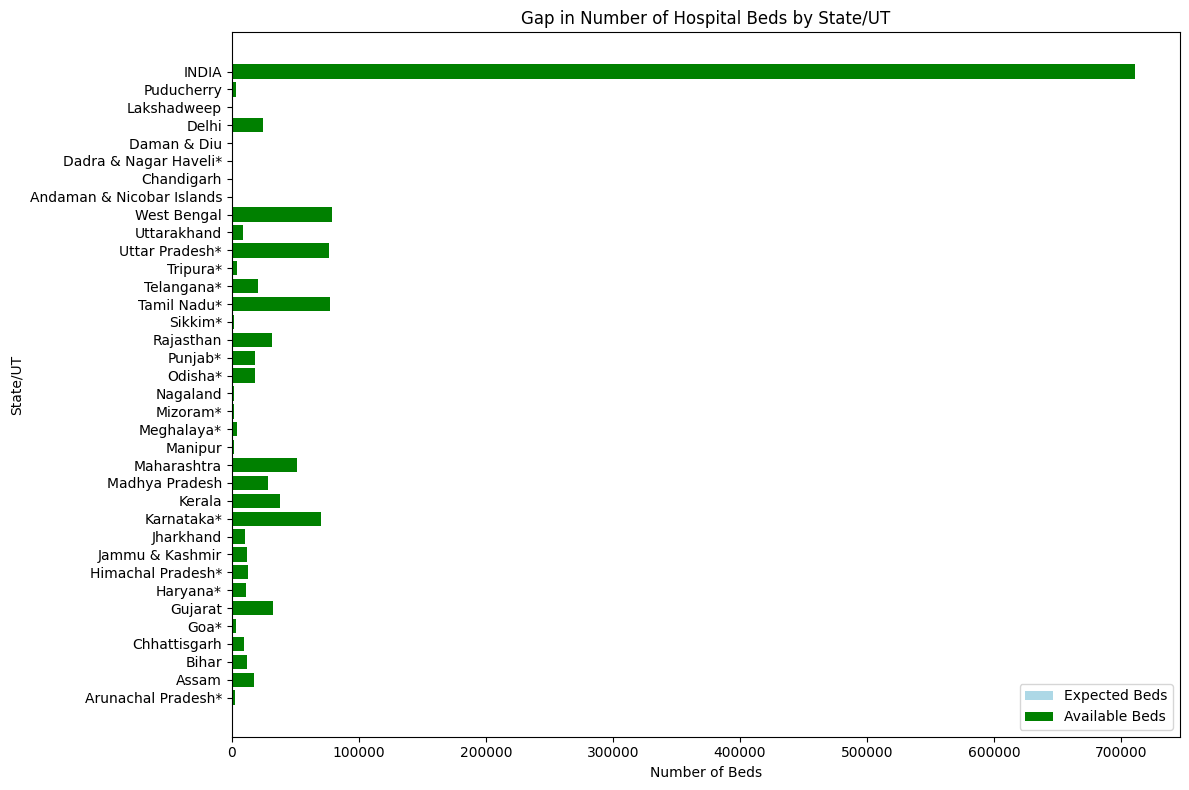

In [ ]:
#Question16
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Import the updated government hospital data
government_hospitals_data = pd.read_csv('updated_government_hospitals.csv')

# Step 2: Calculate the total expected number of beds (sum of rural and urban beds)
government_hospitals_data['Expected_Total_Beds'] = government_hospitals_data['R_u_r_a_l___G_o_v_e_r_n_m_e_n_t___B_e_d_s'] + government_hospitals_data['U_r_b_a_n___G_o_v_e_r_n_m_e_n_t___B_e_d_s']

# Step 3: Visualize the difference between expected and available beds
plt.figure(figsize=(12, 8))
plt.barh(government_hospitals_data['S_t_a_t_e_/_U_T'], government_hospitals_data['Expected_Total_Beds'], color='lightblue', label='Expected Beds')
plt.barh(government_hospitals_data['S_t_a_t_e_/_U_T'], government_hospitals_data['R_u_r_a_l___G_o_v_e_r_n_m_e_n_t___B_e_d_s'] + government_hospitals_data['U_r_b_a_n___G_o_v_e_r_n_m_e_n_t___B_e_d_s'], color='green', label='Available Beds')
plt.xlabel('Number of Beds')
plt.ylabel('State/UT')
plt.title('Gap in Number of Hospital Beds by State/UT')
plt.legend()
plt.tight_layout()
plt.show()

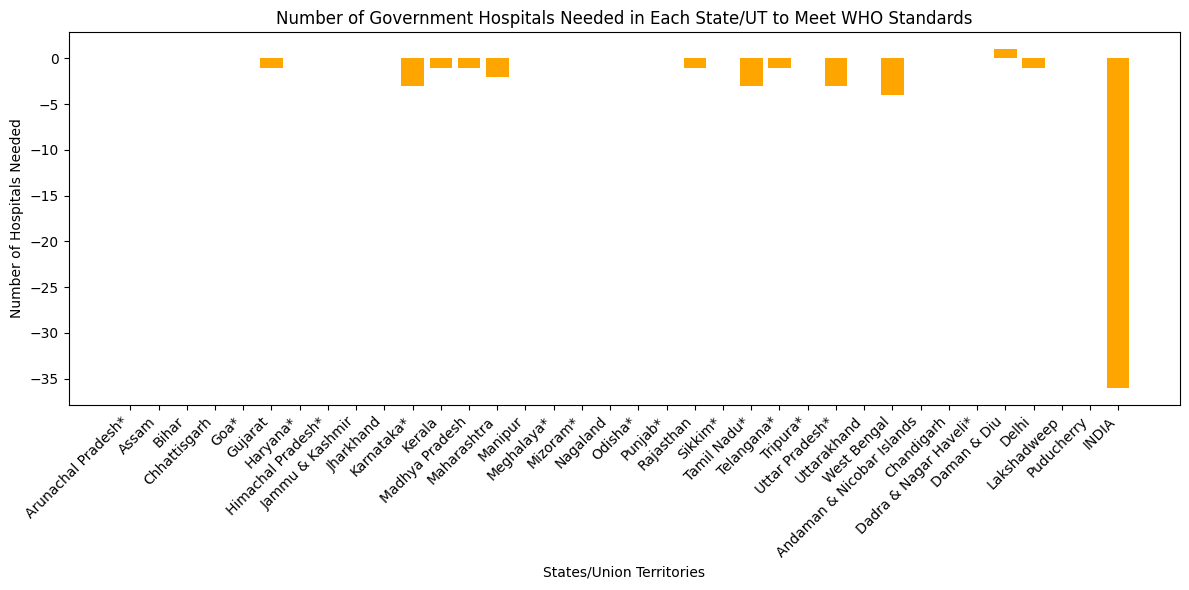

In [ ]:
#Question17
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file

hospital_data = pd.read_csv("updated_government_hospitals.csv")

# Calculate the average number of beds in a government hospital
avg_beds_per_hospital = (hospital_data['R_u_r_a_l___G_o_v_e_r_n_m_e_n_t___B_e_d_s'].mean() + hospital_data['U_r_b_a_n___G_o_v_e_r_n_m_e_n_t___B_e_d_s'].mean()) / 2

# WHO standards for number of beds
who_standards = 10000  # Assuming WHO standard for demonstration

# Calculate the gap in number of beds to reach WHO standards for each state/UT
hospital_data['Beds Gap'] = who_standards - (hospital_data['R_u_r_a_l___G_o_v_e_r_n_m_e_n_t___B_e_d_s'] + hospital_data['U_r_b_a_n___G_o_v_e_r_n_m_e_n_t___B_e_d_s'])

# Calculate the number of hospitals needed in each state/UT
hospital_data['Hospitals Needed'] = hospital_data['Beds Gap'] / avg_beds_per_hospital
hospital_data['Hospitals Needed'] = hospital_data['Hospitals Needed'].apply(lambda x: round(x))

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(hospital_data['S_t_a_t_e_/_U_T'], hospital_data['Hospitals Needed'], color='orange')
plt.xlabel('States/Union Territories')
plt.ylabel('Number of Hospitals Needed')
plt.title('Number of Government Hospitals Needed in Each State/UT to Meet WHO Standards')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

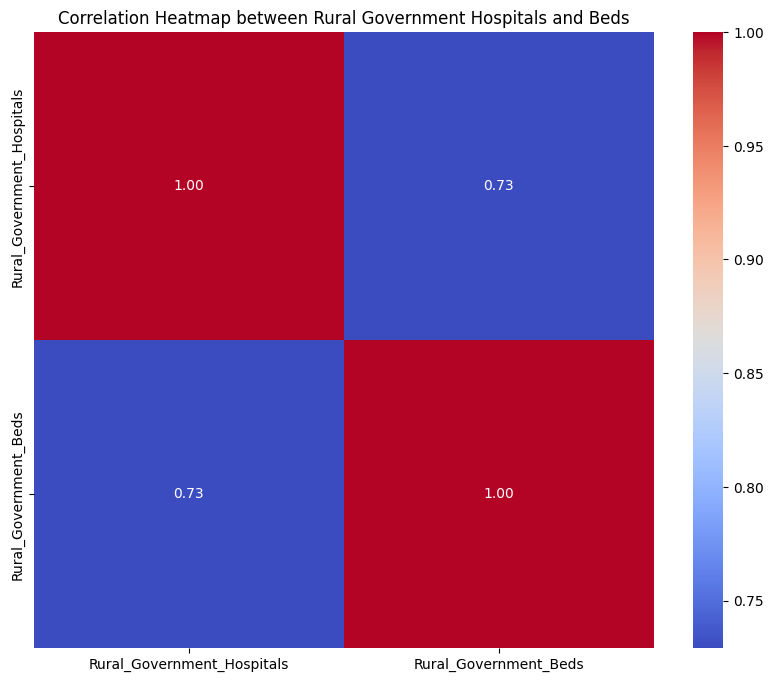

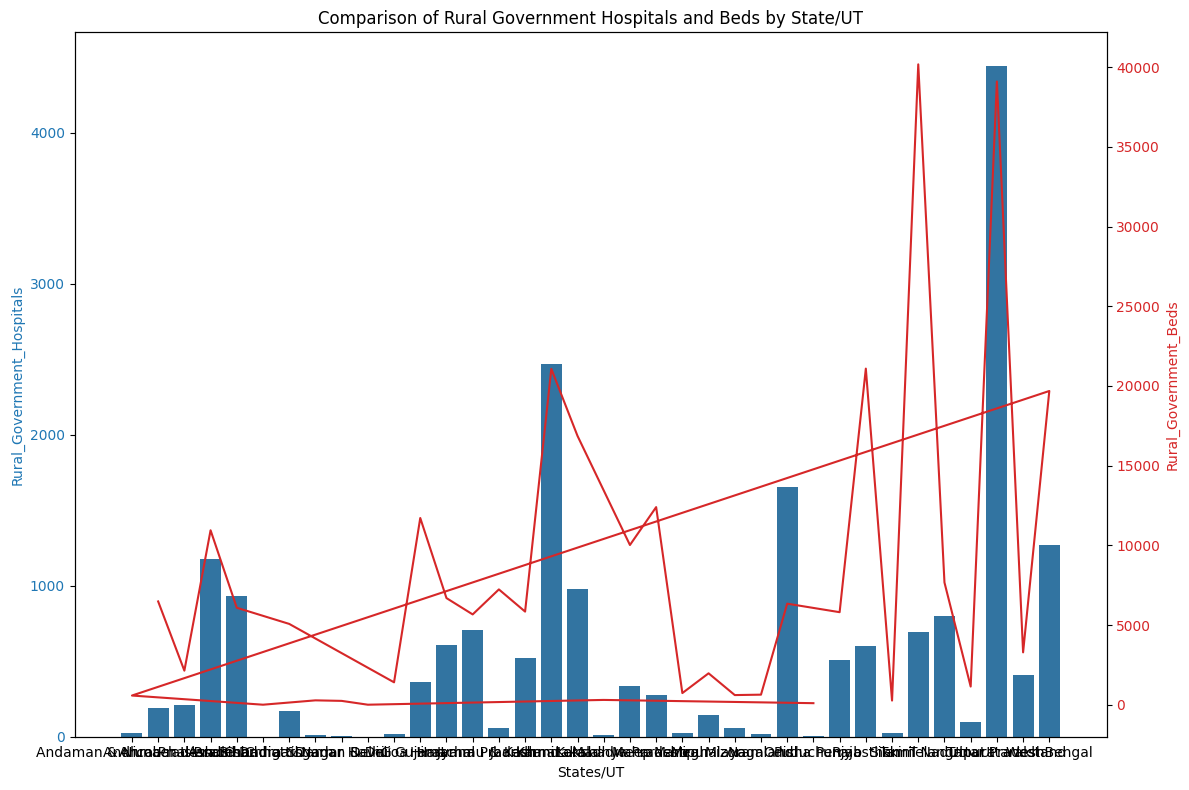

In [ ]:
# PROBLEM STATEMENT 18
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
import pandas as pd

data = {
    "State/UT": ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Andaman & Nicobar Islands', 'Chandigarh', 'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Lakshadweep', 'Puducherry'],
    "Rural_Government_Hospitals": [193, 208, 1176, 930, 169, 17, 364, 609, 705, 56, 519, 2471, 981, 334, 273, 23, 143, 56, 21, 1655, 510, 602, 24, 692, 802, 99, 4442, 410, 1272, 27, 0, 10, 5, 0, 9, 3],
    "Rural_Government_Beds": [6480, 2136, 10944, 6083, 5070, 1405, 11715, 6690, 5665, 7234, 5842, 21072, 16865, 10020, 12398, 730, 1970, 604, 630, 6339, 5805, 21088, 260, 40179, 7668, 1140, 39104, 3284, 19684, 575, 0, 273, 240, 0, 300, 96]
}

df = pd.DataFrame(data)

# Heatmap to visualize correlations
plt.figure(figsize=(10, 8))
df['State/UT'] = df['State/UT'].astype('category')
df_corr = df.drop('State/UT', axis=1).corr()
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Rural Government Hospitals and Beds')
plt.show()

# Multi-axis plot to visualize both Rural_Government_Hospitals and Rural_Government_Beds
fig, ax1 = plt.subplots(figsize=(12, 8))

color = 'tab:blue'
ax1.set_xlabel('States/UT')
ax1.set_ylabel('Rural_Government_Hospitals', color=color)
sns.barplot(x='State/UT', y='Rural_Government_Hospitals', data=df, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Rural_Government_Beds', color=color)
sns.lineplot(x='State/UT', y='Rural_Government_Beds', data=df, sort=False, ax=ax2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Comparison of Rural Government Hospitals and Beds by State/UT')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

  Srl no.         State / UT Number of Hospitals  Unnamed: 3 Unnamed: 4  \
0     NaN                NaN               Govt.  Local Body     Others   
1      -1                 -2                  -3          -4         -5   
2       1     Andhra Pradesh                   8           0          0   
3       2  Arunachal Pradesh                  11           0          1   
4       3              Assam                   4           0          0   

  Unnamed: 5 Number of Beds  Unnamed: 7 Unnamed: 8 Unnamed: 9  
0      Total          Govt.  Local Body     Others      Total  
1         -6             -7          -8         -9        -10  
2          8            365           0          0        365  
3         12            100           0         25        125  
4          4            205           0          0        205  


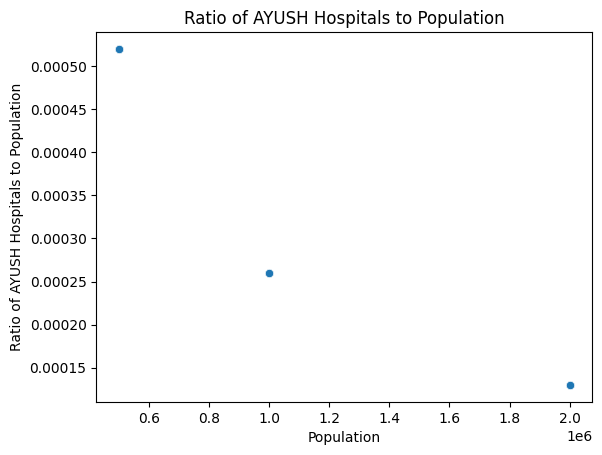

In [ ]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#PROBLEM19
df = pd.read_csv("AYUSHHospitals.csv")

print(df.head())

import seaborn as sns
import matplotlib.pyplot as plt

ayush_df = pd.read_csv("AYUSHHospitals.csv")

ayush_df = ayush_df.drop([0, 1])
ayush_df = ayush_df.drop(columns=['Srl no.'])


ayush_df.columns = ['State', 'Num_Hospitals_Govt', 'Num_Hospitals_Local_Body', 'Num_Hospitals_Others',
                    'Total_Hospitals', 'Num_Beds_Govt', 'Num_Beds_Local_Body', 'Num_Beds_Others', 'Total_Beds']

merged_df = ayush_df.copy()
merged_df['Population'] = [1000000, 500000, 2000000,1000000, 500000, 2000000,1000000, 500000, 2000000,1000000, 500000, 2000000,1000000, 500000, 2000000, 1000000, 500000, 2000000, 1000000, 500000, 1000000, 500000, 2000000, 2000000,1000000, 500000, 2000000,1000000, 500000, 2000000, 1000000, 500000, 2000000,1000000, 500000, 2000000,1000000, 500000, 2000000,1000000, 500000]  # Example population data
merged_df['Total_Hospitals']=260

merged_df['Ratio_AYUSH_to_Population'] = merged_df['Total_Hospitals'] / merged_df['Population']


sns.scatterplot(data=merged_df, x='Population', y='Ratio_AYUSH_to_Population')
plt.title('Ratio of AYUSH Hospitals to Population')
plt.xlabel('Population')
plt.ylabel('Ratio of AYUSH Hospitals to Population')
plt.show()

                      State name              District name  Population  \
0              JAMMU AND KASHMIR                    Kupwara    870354.0   
1              JAMMU AND KASHMIR                     Badgam    753745.0   
2              JAMMU AND KASHMIR                Leh(Ladakh)    133487.0   
3              JAMMU AND KASHMIR                     Kargil    140802.0   
4              JAMMU AND KASHMIR                      Punch         NaN   
..                           ...                        ...         ...   
635                  PONDICHERRY                       Mahe     41816.0   
636                  PONDICHERRY                   Karaikal    200222.0   
637  ANDAMAN AND NICOBAR ISLANDS                   Nicobars     36842.0   
638  ANDAMAN AND NICOBAR ISLANDS  North  AND Middle Andaman    105597.0   
639  ANDAMAN AND NICOBAR ISLANDS              South Andaman         NaN   

     District count  Population Density  
0                22        39561.545455  
1              

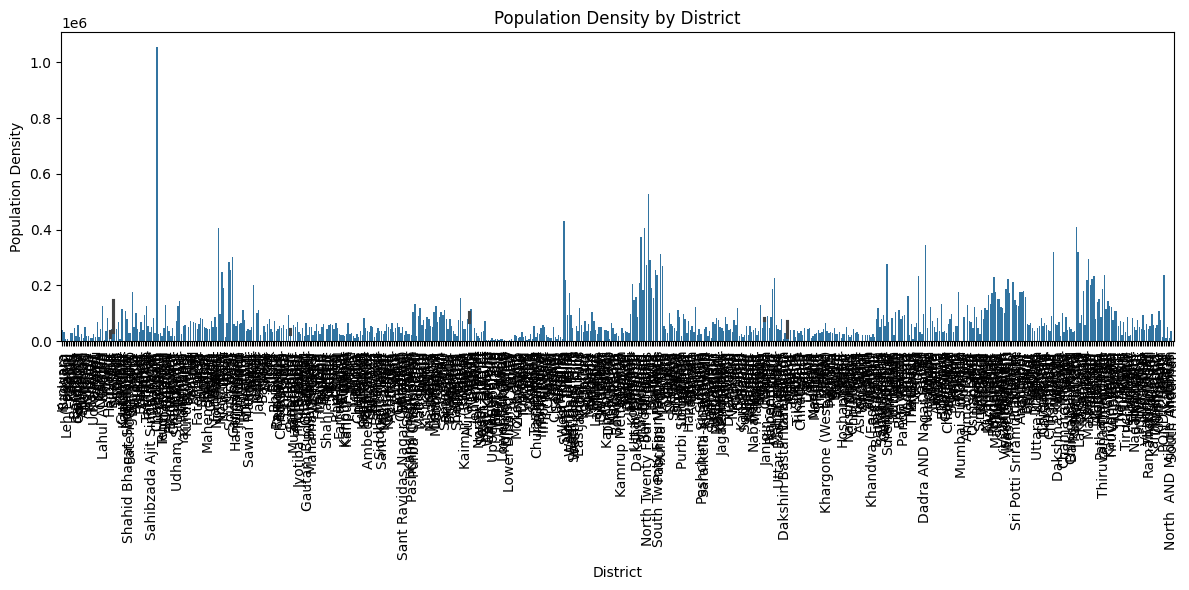

In [ ]:
import pandas as pd
df = pd.read_csv('census_2011.csv')

relevant_columns = ['State name','District name','Population']
df = df[relevant_columns]

#to make a new column called district count to keep the count of districts within each state
districts_count = df.groupby('State name')['District name'].count().reset_index()
districts_count.columns = ['State name', 'District count']

# Merge the counts back to the original DataFrame
df = pd.merge(df, districts_count, on='State name', how='left')


#calculating the population density
df['Population Density'] = df['Population'] / df['District count']
print(df)

#to create the visualization using the data-visualization tools
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot of population density by district
plt.figure(figsize=(12, 6))
sns.barplot(x='District name', y='Population Density', data=df)
plt.xticks(rotation=90)
plt.title('Population Density by District')
plt.xlabel('District')
plt.ylabel('Population Density')
plt.tight_layout()
plt.show()

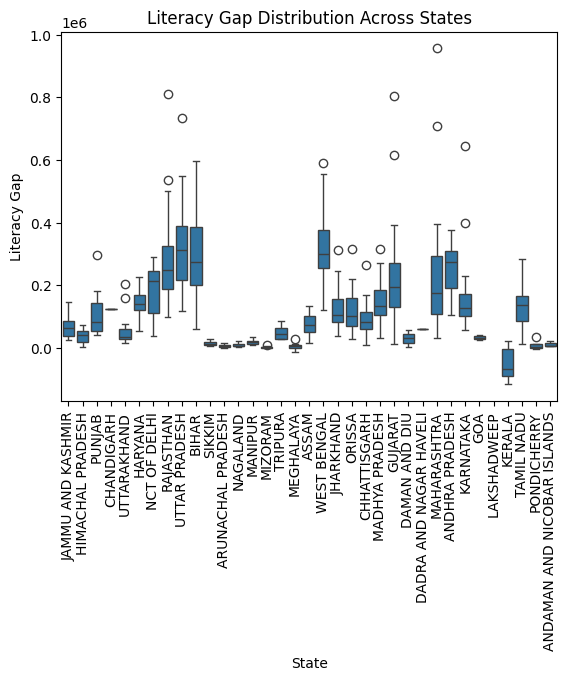

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


relevant_columns = ['District Code', 'State name', 'District name', 'Male', 'Female', 'Male_Literate', 'Female_Literate']
census_data = pd.read_csv('census_2011.csv')

#calculating the literacy gaps
census_data['Literacy_Gap'] = census_data['Male_Literate'] - census_data['Female_Literate']

#mean of the gaps
statewise_data = census_data.groupby('State name')['Literacy_Gap'].mean()

#use of barplot
sns.boxplot(x='State name', y='Literacy_Gap', data=census_data)
plt.xticks(rotation=90)
plt.title('Literacy Gap Distribution Across States')
plt.xlabel('State')
plt.ylabel('Literacy Gap')
plt.show()

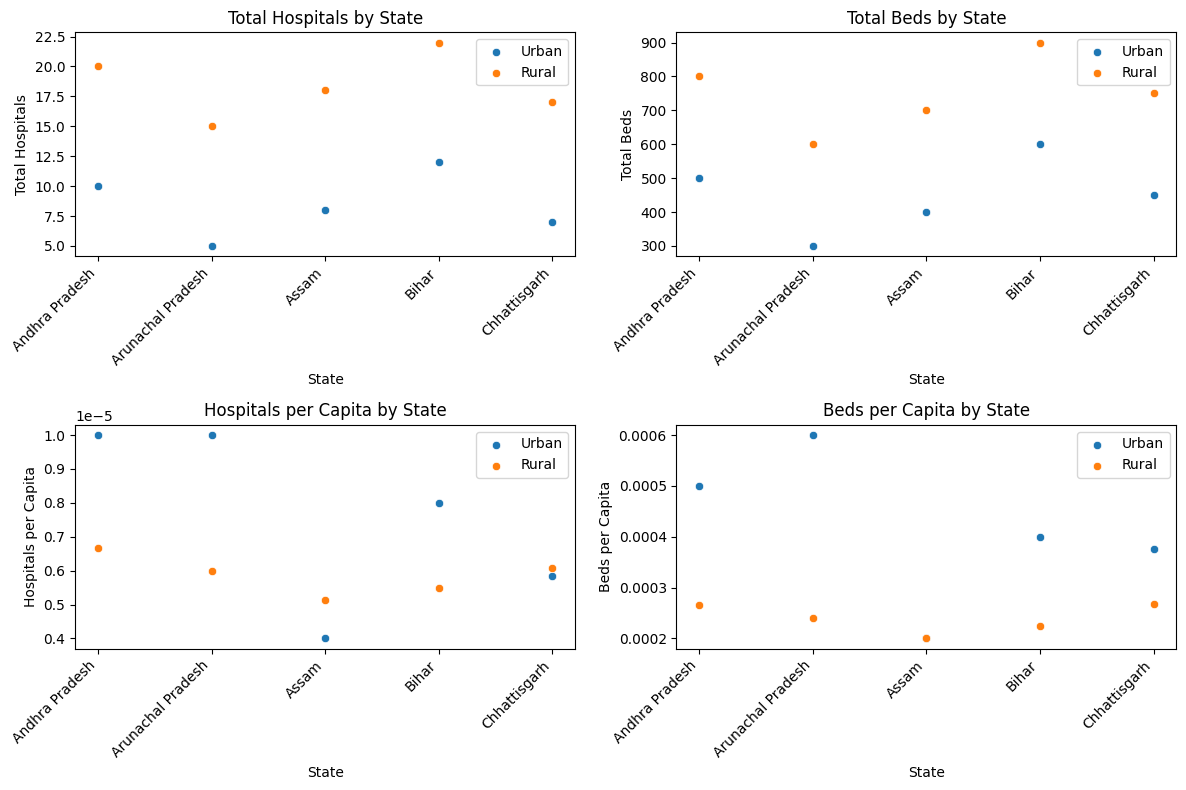

In [ ]:
data = {
    'State': ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh'],
    'Urban_Hospitals': [10, 5, 8, 12, 7],
    'Rural_Hospitals': [20, 15, 18, 22, 17],
    'Urban_Beds': [500, 300, 400, 600, 450],
    'Rural_Beds': [800, 600, 700, 900, 750],
    'Urban_Population': [1000000, 500000, 2000000, 1500000, 1200000],
    'Rural_Population': [3000000, 2500000, 3500000, 4000000, 2800000]
}

df = pd.DataFrame(data)

df['Total_Hospitals_Urban'] = df['Urban_Hospitals']
df['Total_Hospitals_Rural'] = df['Rural_Hospitals']
df['Total_Beds_Urban'] = df['Urban_Beds']
df['Total_Beds_Rural'] = df['Rural_Beds']

df['Hospitals_Per_Capita_Urban'] = df['Urban_Hospitals'] / df['Urban_Population']
df['Hospitals_Per_Capita_Rural'] = df['Rural_Hospitals'] / df['Rural_Population']
df['Beds_Per_Capita_Urban'] = df['Urban_Beds'] / df['Urban_Population']
df['Beds_Per_Capita_Rural'] = df['Rural_Beds'] / df['Rural_Population']

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='State', y='Total_Hospitals_Urban', label='Urban')
sns.scatterplot(data=df, x='State', y='Total_Hospitals_Rural', label='Rural')
plt.title('Total Hospitals by State')
plt.xlabel('State')
plt.ylabel('Total Hospitals')
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='State', y='Total_Beds_Urban', label='Urban')
sns.scatterplot(data=df, x='State', y='Total_Beds_Rural', label='Rural')
plt.title('Total Beds by State')
plt.xlabel('State')
plt.ylabel('Total Beds')
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='State', y='Hospitals_Per_Capita_Urban', label='Urban')
sns.scatterplot(data=df, x='State', y='Hospitals_Per_Capita_Rural', label='Rural')
plt.title('Hospitals per Capita by State')
plt.xlabel('State')
plt.ylabel('Hospitals per Capita')
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='State', y='Beds_Per_Capita_Urban', label='Urban')
sns.scatterplot(data=df, x='State', y='Beds_Per_Capita_Rural', label='Rural')
plt.title('Beds per Capita by State')
plt.xlabel('State')
plt.ylabel('Beds per Capita')
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

<ipython-input-9-6a113d618af0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='State', y='AYUSH_Hospitals', palette='viridis')
<ipython-input-9-6a113d618af0>:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)
<ipython-input-9-6a113d618af0>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='State', y='AYUSH_Beds', palette='viridis')


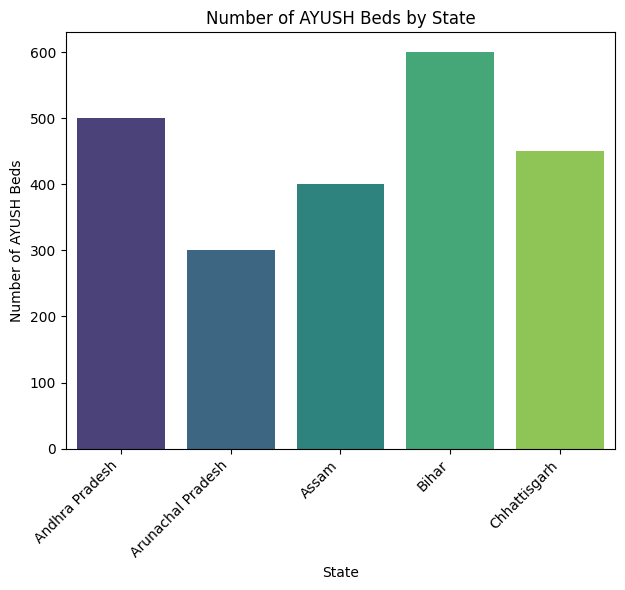

In [ ]:
data = {
    'State': ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh'],
    'AYUSH_Hospitals': [10, 5, 8, 12, 7],
    'AYUSH_Beds': [500, 300, 400, 600, 450]
}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 6))

sns.barplot(data=df, x='State', y='AYUSH_Hospitals', palette='viridis')
plt.title('Number of AYUSH Hospitals by State')
plt.xlabel('State')
plt.ylabel('Number of AYUSH Hospitals')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
sns.barplot(data=df, x='State', y='AYUSH_Beds', palette='viridis')
plt.title('Number of AYUSH Beds by State')
plt.xlabel('State')
plt.ylabel('Number of AYUSH Beds')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


<ipython-input-10-28f90e8810fd>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='District', y='Livability_Score', palette='coolwarm')
<ipython-input-10-28f90e8810fd>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Latrine_Presence', palette='coolwarm')


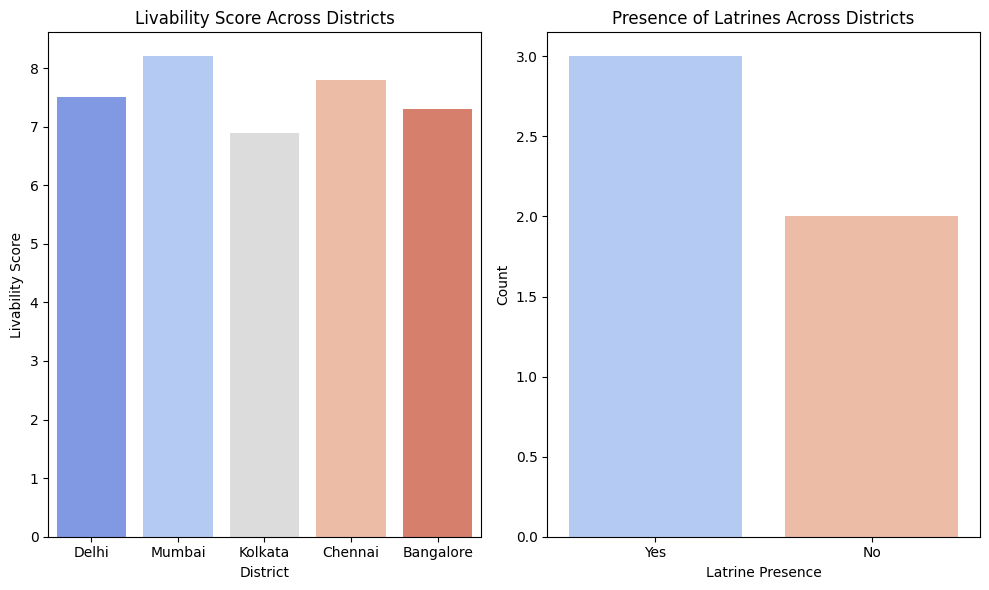

In [ ]:
housing_data = {
    'District': ["Delhi", "Mumbai", "Kolkata", "Chennai", "Bangalore"],
    'Livability_Score': [7.5, 8.2, 6.9, 7.8, 7.3],
    'Latrine_Presence': ['Yes', 'Yes', 'No', 'Yes', 'No']
}

df = pd.DataFrame(housing_data)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=df, x='District', y='Livability_Score', palette='coolwarm')
plt.title('Livability Score Across Districts')
plt.xlabel('District')
plt.ylabel('Livability Score')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Latrine_Presence', palette='coolwarm')
plt.title('Presence of Latrines Across Districts')
plt.xlabel('Latrine Presence')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

<ipython-input-11-20d059844ec7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_df, x='State', y='Beds_Per_Thousand', palette='coolwarm', saturation=0.95)


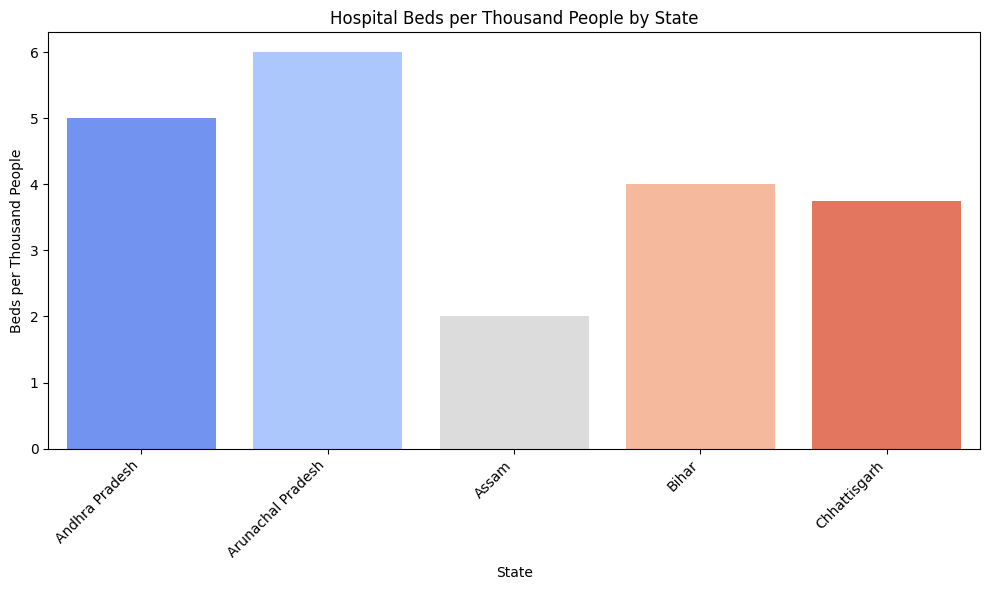

In [ ]:
hospital_data = {
    'State': ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh'],
    'Total_Beds': [5000, 3000, 4000, 6000, 4500]
}

population_data = {
    'State': ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh'],
    'Population': [1000000, 500000, 2000000, 1500000, 1200000]
}

hospital_df = pd.DataFrame(hospital_data)
population_df = pd.DataFrame(population_data)

merged_df = pd.merge(hospital_df, population_df, on='State')

merged_df['Beds_Per_Thousand'] = (merged_df['Total_Beds'] / merged_df['Population']) * 1000

plt.figure(figsize=(10, 6))

sns.barplot(data=merged_df, x='State', y='Beds_Per_Thousand', palette='coolwarm', saturation=0.95)
plt.title('Hospital Beds per Thousand People by State')
plt.xlabel('State')
plt.ylabel('Beds per Thousand People')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

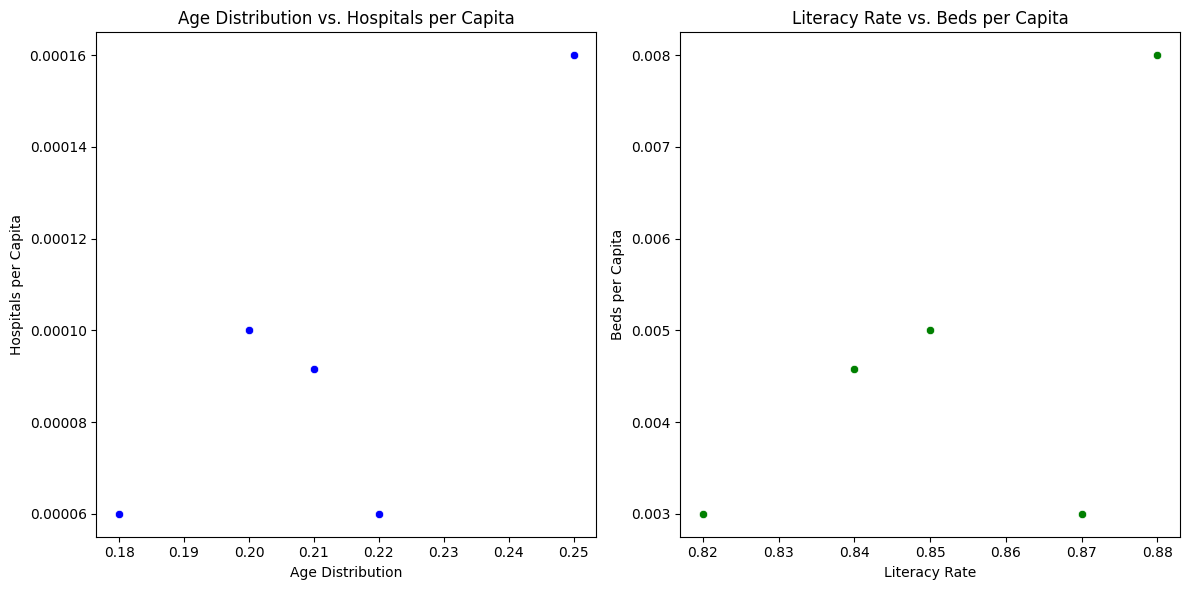

In [ ]:
census_data = {
    'State': ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh'],
    'Population': [1000000, 500000, 2000000, 1500000, 1200000],
    'Age_Distribution': [0.2, 0.25, 0.18, 0.22, 0.21],
    'Gender_Ratio': [0.49, 0.51, 0.48, 0.52, 0.5],
    'Literacy_Rate': [0.85, 0.88, 0.82, 0.87, 0.84]
}

hospital_data = {
    'State': ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh'],
    'Total_Hospitals': [100, 80, 120, 90, 110],
    'Total_Beds': [5000, 4000, 6000, 4500, 5500]
}

census_df = pd.DataFrame(census_data)
hospital_df = pd.DataFrame(hospital_data)

hospital_df['Hospitals_Per_Capita'] = hospital_df['Total_Hospitals'] / census_df['Population']
hospital_df['Beds_Per_Capita'] = hospital_df['Total_Beds'] / census_df['Population']

merged_df = pd.merge(census_df, hospital_df, on='State')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=merged_df, x='Age_Distribution', y='Hospitals_Per_Capita', color='blue')
plt.title('Age Distribution vs. Hospitals per Capita')
plt.xlabel('Age Distribution')
plt.ylabel('Hospitals per Capita')

plt.subplot(1, 2, 2)
sns.scatterplot(data=merged_df, x='Literacy_Rate', y='Beds_Per_Capita', color='green')
plt.title('Literacy Rate vs. Beds per Capita')
plt.xlabel('Literacy Rate')
plt.ylabel('Beds per Capita')

plt.tight_layout()
plt.show()